# Data Extraction and pre-processing

In [81]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [82]:
import yfinance as yf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [83]:
stock1 = yf.download("TATAMOTORS.NS",period="max",interval="1d")

[*********************100%***********************]  1 of 1 completed


In [84]:
df_stock1 = stock1
df_stock1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-12-25,72.819626,72.819626,72.819626,72.819626,53.472767,0
1995-12-26,72.819626,72.819626,72.819626,72.819626,53.472767,0
1995-12-27,72.819626,72.819626,72.819626,72.819626,53.472767,0
1995-12-28,72.819626,72.819626,72.819626,72.819626,53.472767,0
1995-12-29,72.819626,72.819626,72.819626,72.819626,53.472767,0
...,...,...,...,...,...,...
2023-03-13,436.100006,437.000000,419.100006,422.399994,422.399994,8780169
2023-03-14,422.850006,424.200012,413.399994,416.649994,416.649994,9189043
2023-03-15,422.000000,425.000000,410.100006,411.350006,411.350006,7681009


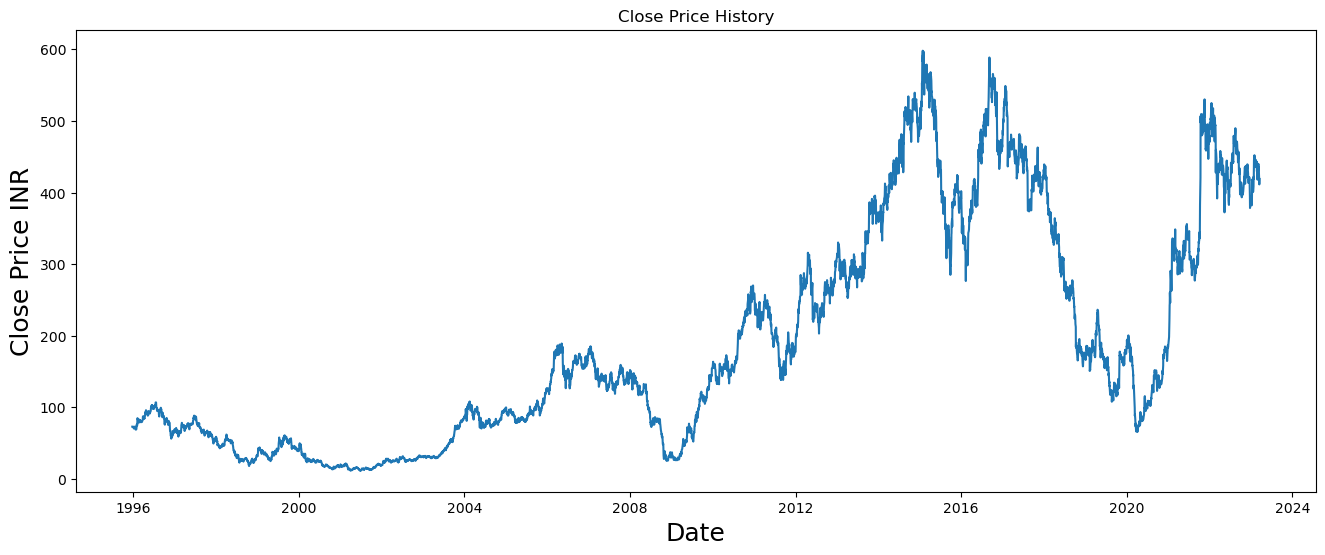

In [85]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df_stock1['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [86]:
df1_stock1 = df_stock1.reset_index()
df1_stock1

,Date,Open,High,Low,Close,Adj Close,Volume
0,1995-12-25,72.819626,72.819626,72.819626,72.819626,53.472767,0
1,1995-12-26,72.819626,72.819626,72.819626,72.819626,53.472767,0
2,1995-12-27,72.819626,72.819626,72.819626,72.819626,53.472767,0
3,1995-12-28,72.819626,72.819626,72.819626,72.819626,53.472767,0
4,1995-12-29,72.819626,72.819626,72.819626,72.819626,53.472767,0
...,...,...,...,...,...,...,...
6846,2023-03-13,436.100006,437.000000,419.100006,422.399994,422.399994,8780169
6847,2023-03-14,422.850006,424.200012,413.399994,416.649994,416.649994,9189043
6848,2023-03-15,422.000000,425.000000,410.100006,411.350006,411.350006,7681009
6849,2023-03-16,413.299988,418.500000,405.000000,415.700012,415.700012,11854885


In [87]:
def load_data(start, end):
    dataframe = df1_stock1.copy()
    dataframe = dataframe.loc[(dataframe['Date'] > start) & (dataframe['Date'] < end), :]
    dataframe = dataframe.rename(columns = {'Closing_Price': 'Close'})
    return dataframe

In [88]:
START_DATE = dt.datetime.today() - pd.Timedelta(days= 300)
END_DATE = dt.datetime.today()  

START_DATE_TEST = END_DATE

In [89]:
df2_stock1 = load_data(start = START_DATE,
                 end = END_DATE)
df2_stock1

,Date,Open,High,Low,Close,Adj Close,Volume
6644,2022-05-23,421.649994,431.149994,419.549988,421.450012,421.450012,16345308
6645,2022-05-24,423.899994,427.500000,416.000000,425.750000,425.750000,14525617
6646,2022-05-25,428.450012,429.000000,413.450012,417.000000,417.000000,13540006
6647,2022-05-26,422.000000,422.649994,405.000000,420.649994,420.649994,17712299
6648,2022-05-27,426.049988,433.250000,425.200012,429.600006,429.600006,16867431
...,...,...,...,...,...,...,...
6846,2023-03-13,436.100006,437.000000,419.100006,422.399994,422.399994,8780169
6847,2023-03-14,422.850006,424.200012,413.399994,416.649994,416.649994,9189043
6848,2023-03-15,422.000000,425.000000,410.100006,411.350006,411.350006,7681009
6849,2023-03-16,413.299988,418.500000,405.000000,415.700012,415.700012,11854885


In [90]:
df2_stock1 = df2_stock1.set_index(df2_stock1['Date'], drop=False, append=False, inplace=False, verify_integrity=False).drop('Date', 1)


C:\Users\nanda\AppData\Local\Temp\ipykernel_13392\2629164352.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2_stock1 = df2_stock1.set_index(df2_stock1['Date'], drop=False, append=False, inplace=False, verify_integrity=False).drop('Date', 1)


In [91]:
# Create a new dataframe with only the 'Close column 
data = df2_stock1.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

197

In [92]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.38654714],
       [0.42511205],
       [0.34663672],
       [0.37937209],
       [0.45964126],
       [0.57443935],
       [0.5847532 ],
       [0.5941704 ],
       [0.54529137],
       [0.48026895],
       [0.48430493],
       [0.51569507],
       [0.51390124],
       [0.44977573],
       [0.44573975],
       [0.25426014],
       [0.24035863],
       [0.3206278 ],
       [0.13094176],
       [0.09506732],
       [0.03901351],
       [0.17264574],
       [0.132287  ],
       [0.25874445],
       [0.27757831],
       [0.32421519],
       [0.34753363],
       [0.3461884 ],
       [0.29999984],
       [0.3080718 ],
       [0.26995521],
       [0.30179367],
       [0.34080717],
       [0.47085202],
       [0.56681598],
       [0.52645723],
       [0.46816127],
       [0.43721973],
       [0.44573975],
       [0.55470857],
       [0.65067254],
       [0.63408055],
       [0.67354266],
       [0.68609865],
       [0.68654698],
       [0.63856486],
       [0.56322859],
       [0.589

In [93]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.38654714, 0.42511205, 0.34663672, 0.37937209, 0.45964126,
       0.57443935, 0.5847532 , 0.5941704 , 0.54529137, 0.48026895,
       0.48430493, 0.51569507, 0.51390124, 0.44977573, 0.44573975,
       0.25426014, 0.24035863, 0.3206278 , 0.13094176, 0.09506732,
       0.03901351, 0.17264574, 0.132287  , 0.25874445, 0.27757831,
       0.32421519, 0.34753363, 0.3461884 , 0.29999984, 0.3080718 ,
       0.26995521, 0.30179367, 0.34080717, 0.47085202, 0.56681598,
       0.52645723, 0.46816127, 0.43721973, 0.44573975, 0.55470857,
       0.65067254, 0.63408055, 0.67354266, 0.68609865, 0.68654698,
       0.63856486, 0.56322859, 0.5892375 , 0.57309412, 0.63901345,
       0.90448436, 0.87802685, 0.80224199, 0.81210751, 0.77937214,
       0.80627797, 0.87174871, 0.88161424, 0.88968593, 1.        ])]
[0.9600895766185538]

[array([0.38654714, 0.42511205, 0.34663672, 0.37937209, 0.45964126,
       0.57443935, 0.5847532 , 0.5941704 , 0.54529137, 0.48026895,
       0.48430493, 0.51569507, 0.513

## Applying LSTM

What is a LSTM ?

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. Introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work. They work tremendously well on a large variety of problems, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

All recurrent neural networks have the form of a chain of repeating modules of neural network.

In [104]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
137/137 [==============================] - 12s 50ms/step - loss: 0.0204
Epoch 2/20
137/137 [==============================] - 7s 50ms/step - loss: 0.0152
Epoch 3/20
137/137 [==============================] - 6s 42ms/step - loss: 0.0105
Epoch 4/20
137/137 [==============================] - 6s 44ms/step - loss: 0.0102
Epoch 5/20
137/137 [==============================] - 6s 44ms/step - loss: 0.0094
Epoch 6/20
137/137 [==============================] - 6s 41ms/step - loss: 0.0077
Epoch 7/20
137/137 [==============================] - 6s 45ms/step - loss: 0.0070
Epoch 8/20
137/137 [==============================] - 6s 43ms/step - loss: 0.0081
Epoch 9/20
137/137 [==============================] - 6s 41ms/step - loss: 0.0058
Epoch 10/20
137/137 [==============================] - 6s 45ms/step - loss: 0.0068
Epoch 11/20
137/137 [==============================] - 6s 42ms/step - loss: 0.0062
Epoch 12/20
137/137 [==============================] - 6s 43ms/step - loss: 0.0056
Epoch 13/20


In [105]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 60, 128)           66560     
                                                                 
 lstm_13 (LSTM)              (None, 64)                49408     
                                                                 
 dense_12 (Dense)            (None, 25)                1625      
                                                                 
 dense_13 (Dense)            (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [106]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 2s 2s/step


7.167508304324121

C:\Users\nanda\AppData\Local\Temp\ipykernel_13392\3005159404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


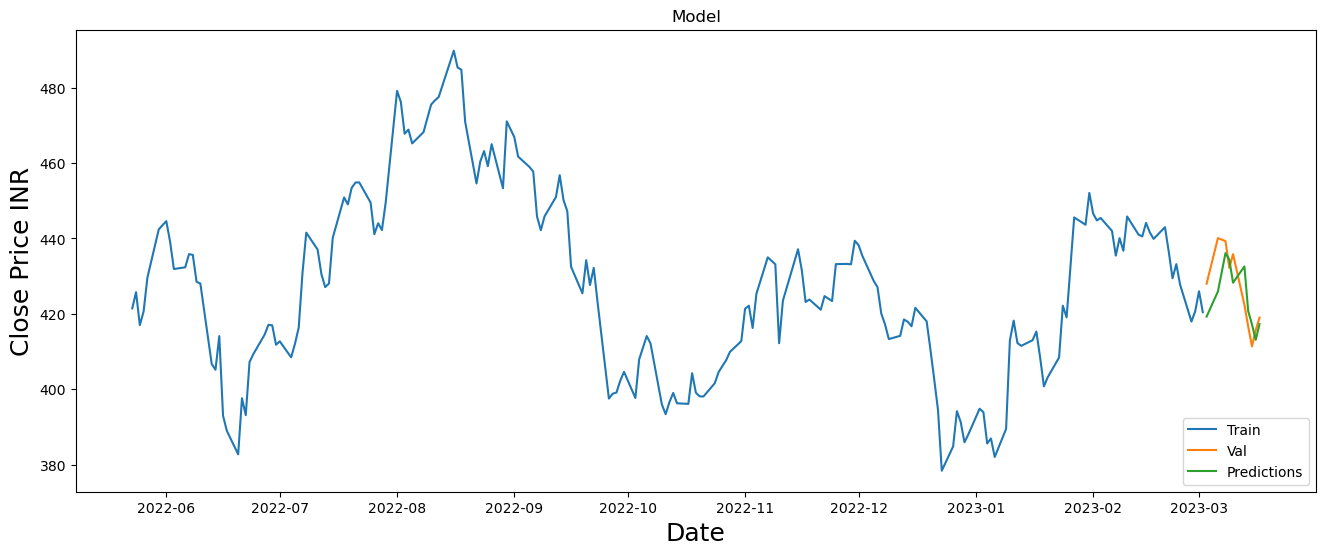

In [107]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [108]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-03-03,428.000000,419.260468
2023-03-06,440.100006,425.939178
2023-03-08,439.299988,436.135040
2023-03-09,432.200012,434.397522
2023-03-10,435.850006,428.256012
2023-03-13,422.399994,432.588806
2023-03-14,416.649994,420.736145
2023-03-15,411.350006,417.180511
2023-03-16,415.700012,413.092499
